# 📈 Polynomial Regression - Theoretical Overview

Polynomial Regression is an extension of linear regression used when the relationship between the input variable(s) and output is **non-linear**. It enables the fitting of a **curved line** to the data by introducing polynomial terms.

---

## 🧠 Key Concepts

### ✅ What is Polynomial Regression?
Polynomial Regression models the relationship between a **dependent variable** `y` and an **independent variable** `x` as an `n`th degree polynomial.

It’s useful when linear regression cannot capture the underlying data trend.

> ⚠️ Although it models a non-linear relationship, it is still **linear in parameters** (coefficients).

---

### 🧮 Mathematical Representation

\[
y = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3 + \cdots + \beta_nx^n
\]

- `β₀, β₁, ..., βn`: coefficients (learned during training)
- `n`: degree of the polynomial
- `x`: input variable

---

### 🕒 When to Use Polynomial Regression

- When data shows **non-linear trends** (e.g., curves or bends)
- Example patterns: **parabolic**, **cubic**, or **sinusoidal**

> 📌 A linear model will underfit such data. A polynomial model can capture the curvature.

---

## ⚖️ Underfitting vs Overfitting

### 📉 Underfitting
- Degree is **too low**
- Model fails to capture the trend
- Both training and test error are high

### 📈 Overfitting
- Degree is **too high**
- Model fits noise in training data
- Low training error, but high test error

### 🎯 How to Choose Degree
- Use **cross-validation** to find the optimal degree
- Plot **learning curves** to diagnose bias/variance tradeoff

---

## 🧩 Polynomial Features

To apply polynomial regression using linear models:
- Use **`PolynomialFeatures`** from `sklearn.preprocessing`
- It transforms input `x` to `[x⁰, x¹, x², ..., xⁿ]`

For **multiple features**, it generates:
- Individual powers: `x²`, `y²`
- Interaction terms: `xy`

---

## 🌐 Extension to Multivariate Case

When dealing with **multiple input features** (`X₁`, `X₂`, ...):

### Without Polynomial:
- Regular multiple linear regression gives a **flat plane** in 3D

### With Polynomial Features:
- Generates higher-degree terms like `x²`, `y²`, `xy`
- Enables fitting a **curved surface** in 3D space

---

## ✅ Summary

| Aspect              | Linear Regression             | Polynomial Regression          |
|---------------------|-------------------------------|--------------------------------|
| Relationship Type   | Linear                        | Non-linear                     |
| Model Type          | Linear in coefficients        | Linear in coefficients         |
| Input Transformation| Not required                  | Required (e.g., `x²`, `xy`)    |
| Overfitting Risk    | Low (but can underfit)        | High (if degree too large)     |
| Use Cases           | Straight-line trends          | Curved trends (parabolic, etc) |

---

> 🧪 Choosing the **right degree** and using **regularization** (like Ridge/Lasso) can help build robust polynomial regression models.

---

In [114]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [115]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

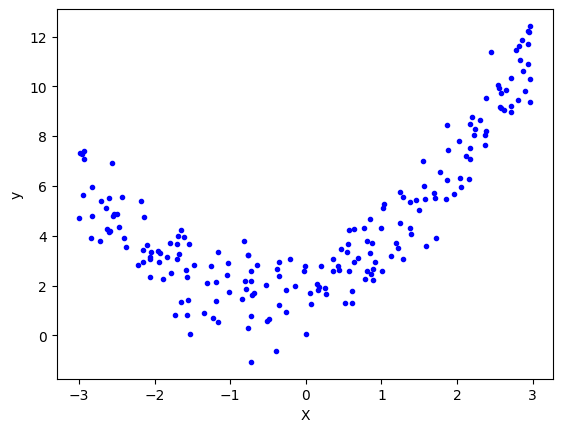

In [116]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [117]:

# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [118]:
# Applying linear regression
lr = LinearRegression()

In [119]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [120]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.3041283664624538

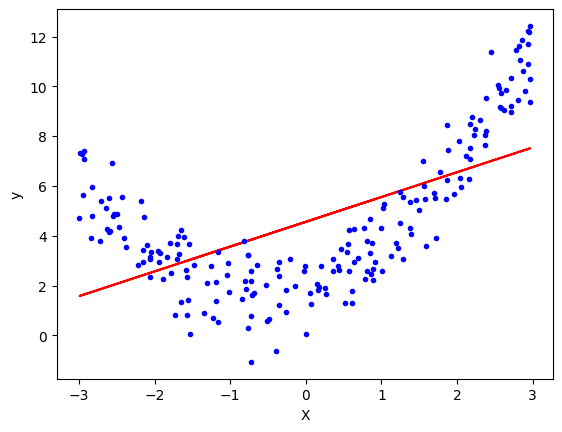

In [121]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [122]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)


In [123]:
print(X_train[0])
print(X_train_trans[0])

[-1.55335887]
[ 1.         -1.55335887  2.41292379]


In [124]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [125]:
y_pred = lr.predict(X_test_trans)
r2_score(y_test,y_pred)

0.8543523500750778

In [126]:
print(lr.coef_)
print(lr.intercept_)

[[0.        0.8971339 0.7705046]]
[2.00301536]


In [127]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

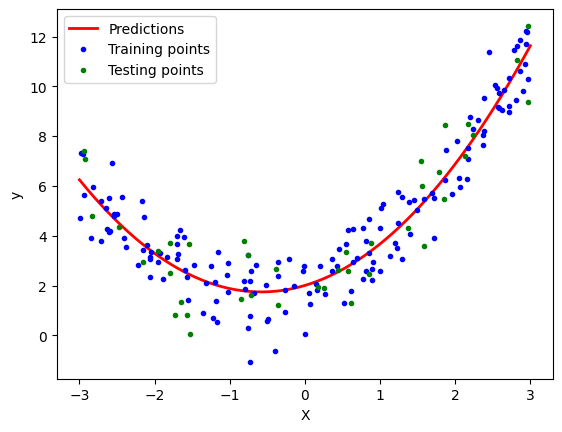

In [128]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [129]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()


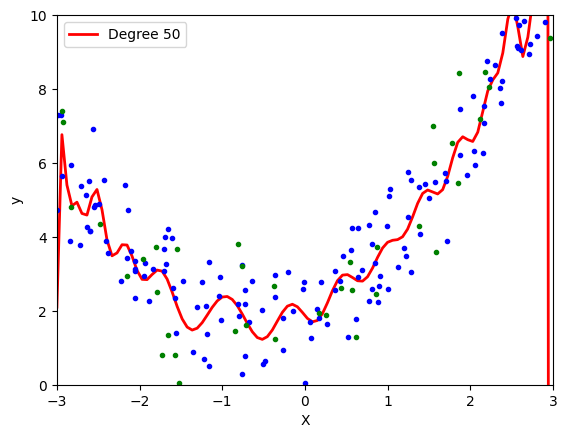

In [130]:
polynomial_regression(50)

In [131]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [132]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [133]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [134]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [135]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [136]:
poly = PolynomialFeatures(degree=2)
X_multi_trans = poly.fit_transform(X_multi)

In [137]:
X_multi_trans.shape

(100, 6)

In [138]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [139]:
X_test_multi = poly.transform(final)

In [140]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [141]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()

# 🤖 Bias, Variance, Overfitting & Underfitting in Machine Learning

Understanding these core concepts is essential for building models that generalize well to unseen data.

---

## 🧠 Key Concepts

### 🎯 Bias
- Bias refers to a model's **error due to overly simplistic assumptions**.
- A **high-bias** model fails to capture the underlying patterns in the data.
- Performs **poorly on both training and test data**.
- **Analogy**: A student who doesn’t study and performs badly on both mock and final exams.

> ⚠️ High Bias → **Underfitting**

---

### 📉 Variance
- Variance refers to a model's **sensitivity to small changes** in the training data.
- A **high-variance** model memorizes the data (including noise).
- Performs **well on training data** but **poorly on test data**.
- **Analogy**: A student who memorizes questions without understanding concepts, and struggles with new questions.

> ⚠️ High Variance → **Overfitting**

---

## ⚖️ Overfitting vs Underfitting

| Term         | Cause             | Model Behavior                                  | Performance         |
|--------------|-------------------|--------------------------------------------------|---------------------|
| Underfitting | High Bias         | Too simple, fails to learn the data              | Poor on train/test  |
| Overfitting  | High Variance     | Too complex, learns noise                        | Good on train, bad on test |

---

## 🔁 The Bias-Variance Trade-off

There is a trade-off between **bias** and **variance**:

- **Simple models** → High Bias, Low Variance
- **Complex models** → Low Bias, High Variance

### ✅ Goal:
Find a **balance** — a model with:
- Low Bias ✅
- Low Variance ✅  
→ Performs well on both training and test data

This is called a **"just right" model**, one that generalizes effectively without underfitting or overfitting. 🎯

---

## 📌 Summary

| Concept        | Description                                                                 |
|----------------|-----------------------------------------------------------------------------|
| Bias           | Error from incorrect assumptions — model too simple                        |
| Variance       | Error from sensitivity to fluctuations — model too complex                 |
| Underfitting   | High bias — model doesn't learn enough                                     |
| Overfitting    | High variance — model learns too much, including noise                     |
| Ideal Model    | Balances bias and variance, generalizes well to unseen data               |

